# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [76]:
#Data Exploration

print(df.head())
print(df.info())
print(df.shape)

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
(130, 3)


** 1. Is the distribution of body temperatures normal?**

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

In [3]:
# import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
#Calculate the emperical mean and standard deviation

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
print('Mean Temp F:', mean, 'Standard Deviation:', std)

('Mean Temp F:', 98.24923076923078, 'Standard Deviation:', 0.7303577789050377)


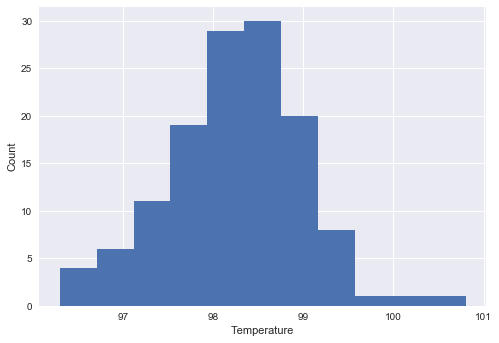

In [12]:
#Calculate the number of bins. n_data should equal 130 as indicated in the .info(), but writing the code will make dynamic

n_data = len(df['temperature'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(df['temperature'], bins= n_bins)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Count')

plt.show()

In [36]:
#Compute ECDF for temperature data: x_temp, y_temp
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    return x, y

In [39]:
#Create the samples
samples = np.random.normal(mean, std, size=10000)

#Calculate the ECDF of the data and the samples
x_temp, y_temp = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)

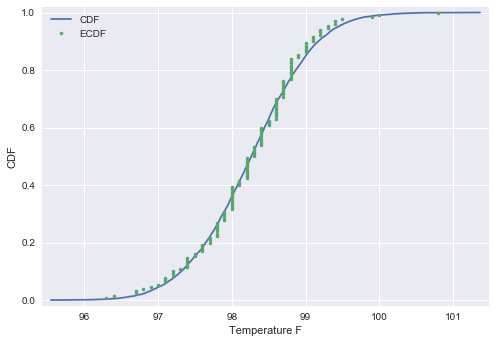

In [43]:
#Graph the ECDF of the data and the samples
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Temperature F')
_ = plt.ylabel('CDF')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

**2. Is the sample size large? Are the observations independent?**

*Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.*

According to the Central Limit Theorem definition, a "sufficiently large" sample size is typically one of 30 or more. The temperature dataset includes 130 samples. Since 130 samples is greater than 30, this sample size is considered large enough. The observations are independent.

**3. Is the true population mean really 98.6 degrees F? **

No, the true population mean was 98.25 F.
    
*Would you use a one-sample or two-sample test? Why?*

A one-sample test. We are comparing the mean of the sample to a known value (98.6). The two sample would be comparing the mean of two different samples.

*In this situation, is it appropriate to use the  t or  z  statistic?*
It is appropriate to use the t statistic. We do not know the standard deviation of the population, just the mean. Even though the sample size is larger than 30, the Z Test is not the ideal option since we don't have the population's standard deviation. 

*Now try using the other test. How is the result be different? Why?*

In [44]:
#Even though it's above, utilize describe to show the mean.
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [45]:
#Import library necessary for t-test and z-score

from scipy import stats

#T-test for one sample
one_sample = stats.ttest_1samp(df['temperature'], 98.6)

print(one_sample)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [47]:
#Calculate the z scores
zscore = stats.zscore(df['temperature'])
print(zscore)

[ 1.43870478  0.20643202 -0.61508316  1.30178559 -0.34124477  1.30178559
 -0.34124477  0.7541088   0.20643202  0.48027041  0.7541088  -2.12119432
 -0.06740637  0.61718961 -0.61508316  0.7541088   0.06951282 -0.06740637
 -1.43659834  1.57562398  0.06951282 -0.06740637  0.48027041  0.20643202
 -0.61508316 -0.34124477 -0.61508316 -0.06740637  0.20643202 -0.20432557
  0.06951282 -0.88892155  0.34335121  0.48027041  1.43870478  1.71254318
  1.16486639  0.06951282 -0.47816396 -2.5319519   0.20643202  0.20643202
 -1.84735592 -1.43659834  1.0279472  -0.47816396 -1.16275994 -1.16275994
 -0.47816396 -1.57351753  0.891028    0.06951282  0.34335121  0.48027041
 -0.06740637  0.48027041  0.7541088  -0.06740637 -0.06740637 -0.88892155
  1.16486639  0.20643202 -0.06740637  0.48027041  0.61718961 -1.16275994
 -1.16275994  0.48027041  0.61718961  0.891028   -0.20432557 -0.75200235
 -0.34124477  0.7541088   1.0279472   0.7541088  -0.34124477  0.20643202
 -1.16275994 -0.88892155  0.7541088  -0.34124477 -1

**4. Draw a small sample of size 10 from the data and repeat both tests.**

*Which one is the correct one to use?* The t-test should be utilized on samples smaller than 30.

*What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?*

In [50]:
random_sample10 = np.random.choice(df['temperature'], size=10)
print(random_sample10)

[ 98.   98.6  98.7  99.5  98.8  98.2  98.3  98.2  97.9  98.8]


In [51]:
one_sample_v2 = stats.ttest_1samp(random_sample10, 98.6)

print(one_sample_v2)

Ttest_1sampResult(statistic=-0.66097897385890603, pvalue=0.52518258675826179)


In [52]:
zscore = stats.zscore(random_sample10)
print(zscore)

[-1.10163162  0.22032632  0.44065265  2.20326325  0.66097897 -0.66097897
 -0.44065265 -0.66097897 -1.32195795  0.66097897]


**5. At what temperature should we consider someone's temperature to be "abnormal"?**

*Start by computing the margin of error and confidence interval.*

In [56]:
#Margin of Error
z = 1.96 #score for 95% confidence
margin_error = z * (std/np.sqrt(n_data))
print'Margin of Error: ',margin_error

Margin of Error:  0.125550964803


In [60]:
#Confidence Intervals
conf_int = np.percentile(df['temperature'], [2.5, 97.5])
print'The average human temperature is between: ', conf_int[0], 'and ', conf_int[1]
print'An abnormal human temperature is lower than: ', conf_int[0], 'F, or higher than: ', conf_int[1], ' F'

The average human temperature is between:  96.7225 and  99.4775
An abnormal human temperature is lower than:  96.7225 F, or higher than:  99.4775  F


**6. Is there a significant difference between males and females in normal temperature?**

*What test did you use and why?* I utilized the two sample t-test to obtain the p-value.

*Write a story with your conclusion in the context of the original problem.*

In [67]:
#Separate the male and female datapoints
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

#Explore the new datasets
print(males.head())
print(males.info())
print(females.head())
print(females.info())

    temperature gender  heart_rate
2          97.8      M        73.0
5          99.2      M        83.0
6          98.0      M        71.0
7          98.8      M        78.0
12         98.2      M        72.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB
None
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
3         99.2      F        66.0
4         98.0      F        73.0
8         98.4      F        84.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 129
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB
None


In [69]:
#Calculate the mean and standard deviations for the two new datasets.
male_mean = np.mean(males['temperature'])
male_std = np.std(males['temperature'])
female_mean = np.mean(females['temperature'])
female_std = np.std(females['temperature'])
print('Mean Temp Males in F:', male_mean, 'Standard Deviation Males:', male_std)
print('Mean Temp Females in F:', female_mean, 'Standard Deviation Females:', female_std)

('Mean Temp Males in F:', 98.1046153846154, 'Standard Deviation Males:', 0.6933598841828696)
('Mean Temp Females in F:', 98.39384615384613, 'Standard Deviation Females:', 0.7377464486428966)


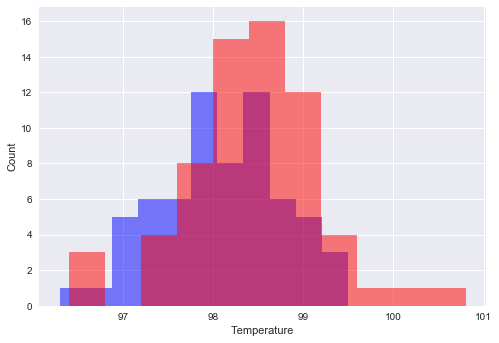

In [70]:
#Create a histogram showing both datasets.
sns.set()
_ = plt.hist(males['temperature'], bins= n_bins, alpha=0.5, color='b')
_ = plt.hist(females['temperature'], bins= n_bins, alpha=0.5, color='r')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Count')
plt.show()

In the overlapped histogram it is easy to see that while there is significant overlap between the male and female temperatures, the females temperatures tend to be a bit higher than the males.

In [71]:
#Calculate the ECDF of the data for males and females
x_mtemp, y_mtemp = ecdf(males['temperature'])
x_ftemp, y_ftemp = ecdf(females['temperature'])

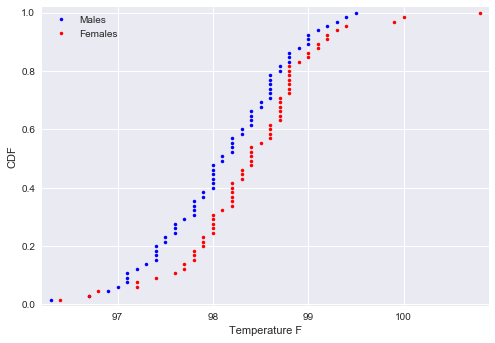

In [73]:
#Create an ECDF graph for the two datasets
_ = plt.plot(x_mtemp, y_mtemp, marker ='.', linestyle= 'none', color='b')
_ = plt.plot(x_ftemp, y_ftemp, marker ='.', linestyle= 'none', color='r')
_ = plt.margins(0.02)
_ = plt.xlabel('Temperature F')
_ = plt.ylabel('CDF')
_ = plt.legend(('Males', 'Females'), loc='upper left')
plt.show()

The ECDF graph also illustrates that there is a difference between the male and female temperatures.

In [77]:
#Calculate the t statistic and p-value for the two sample t-test.

two_sample = stats.ttest_ind(males['temperature'], females['temperature'])

print(two_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


The p-value of less than 0.05 indicates that we should reject the hypothesis that there is a significant difference between male and female temperatures.

**Conclusion**

The mean value of human temperature of 98.6 is slightly higher than the mean of this sample. The mean of this data was 98.2 with a margin of error of 0.125. 98.25+0.125 = 98.375 which is still, slightly lower than the 98.6. However, 98.6 is within a 95% confidence interval and should still be considered a "normal" temperature.

Further analysis indicated that while not statistically significant, females do have a tendancy to have a slightly higher temperature than males (98.39 and 98.10 respectively. 
